# MNIST Handwritten Digits Dataset

This notebook loads data from the MNIST dataset, and tries to train a simple Convolutional Neural Network on that dataset. Afterwards this notebook also tries to fit the Resnet-50 Architecture.

### Import Libraries

Importing the required libraries and functions. We will be using Keras as the primary library for importing the data and the model layers, characterstics and weights

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
from keras.datasets import mnist
from keras.layers import Conv2D, Dense, Flatten, Dropout, Input, MaxPool2D, Activation
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.utils import to_categorical
from keras.applications import ResNet50

C:\Users\Saksham Goel\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Getting the Data

This section first loads the data into respective training and testing arrays and divides them into input features (images) and the labels (number in the image). Then we will visualize some random digits from the datasets and just get a sense of the whole dataset before starting to actually work on them.

In [2]:
# Loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Need to convert the y values (true labels) to one-hot 
# vector representation for being able to do classification task
y_train_cvec = to_categorical(y_train, num_classes=10)
y_test_cvec = to_categorical(y_test, num_classes=10)

In [4]:
# Finding the number of samples in train and test
print(f'Number of training Examples: {X_train.shape[0]}, Number of test examples: {X_test.shape[0]}')

# Finding the shape of the input tensor/image
print(f'Shape of the input tensor (image): {X_train[0].shape}')

Number of training Examples: 60000, Number of test examples: 10000
Shape of the input tensor (image): (28, 28)


Text(0.5,1,'Digit: 5')

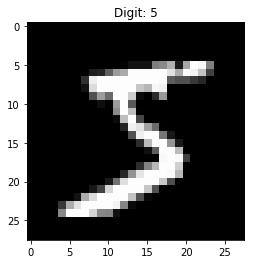

In [5]:
# Trying to visualize the first digit in the dataset
plt.imshow(X_train[0], cmap='gray')
plt.title(f'Digit: {y_train[0]}')

In [6]:
# Trying to Visualize a bunch of random digits
def visualize_digits(grid_dimension: tuple, fig_size: tuple = (10, 10), dataset = (X_train, y_train)):
    if len(grid_dimension) != 2:
        raise ValueError('Inavlid dimension for the grid dimenison tuple')
    else:
        _, axes = plt.subplots(grid_dimension[0], grid_dimension[-1], figsize=fig_size, squeeze=False)
        random_choice_index = np.random.choice(np.arange(len(dataset[0])), grid_dimension)
        for x_index in range(grid_dimension[0]):
            for y_index in range(grid_dimension[-1]):
                axes[x_index][y_index].imshow(dataset[0][random_choice_index[x_index, y_index]], cmap='gray')
                axes[x_index][y_index].set_title(f'Digit: {dataset[-1][random_choice_index[x_index, y_index]]}')

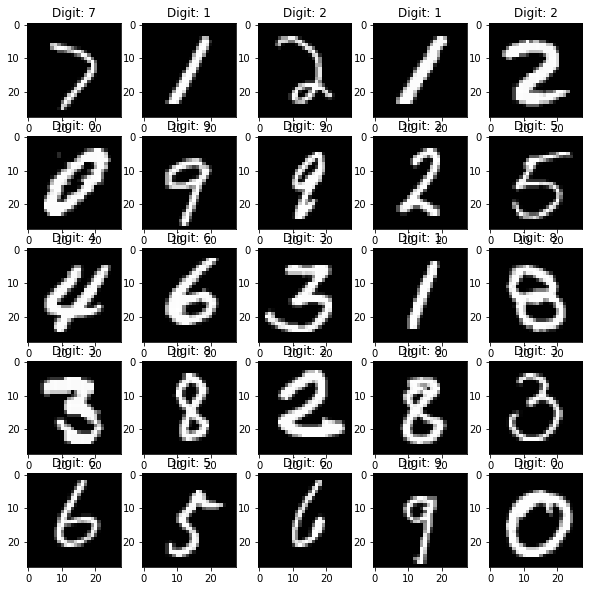

In [7]:
visualize_digits((5, 5))

### Multilayer Perceptron Model

This section is used for defining a simple Multilayer Perceptron Model to recognize the digits.

In [8]:
# Need to change the shape of X_train and X_test so that each digit is a vector (flattened matrix)
# Also need to regularize the input feature data between 0 and 1
X_train_mp = X_train.reshape((-1, 28*28))
X_test_mp = X_test.reshape((-1, 28*28))

In [9]:
# First we will define a model with just One Hidden Layer
model_mlp = Sequential()
# Hidden Layer will contain only 128 nodes
model_mlp.add(Dense(128, input_shape = (28*28,)))
# Output layer will contain 10 Nodes, corresponding to the 10 Classes (Digits)
model_mlp.add(Dense(10, activation = 'softmax'))

In [10]:
model_mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
mlp_train_hist = model_mlp.fit(X_train_mp, y_train_cvec, epochs = 20, validation_split = 0.3, verbose=2)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 4s - loss: 0.2435 - acc: 0.9306 - val_loss: 0.3046 - val_acc: 0.9202
Epoch 2/20
 - 4s - loss: 0.2409 - acc: 0.9308 - val_loss: 0.3113 - val_acc: 0.9170
Epoch 3/20
 - 5s - loss: 0.2407 - acc: 0.9318 - val_loss: 0.3096 - val_acc: 0.9176
Epoch 4/20
 - 4s - loss: 0.2396 - acc: 0.9320 - val_loss: 0.3225 - val_acc: 0.9154
Epoch 5/20
 - 4s - loss: 0.2396 - acc: 0.9311 - val_loss: 0.3200 - val_acc: 0.9158
Epoch 6/20
 - 4s - loss: 0.2387 - acc: 0.9317 - val_loss: 0.3258 - val_acc: 0.9146
Epoch 7/20
 - 4s - loss: 0.2384 - acc: 0.9326 - val_loss: 0.3134 - val_acc: 0.9202
Epoch 8/20
 - 4s - loss: 0.2368 - acc: 0.9330 - val_loss: 0.3086 - val_acc: 0.9191
Epoch 9/20
 - 5s - loss: 0.2365 - acc: 0.9334 - val_loss: 0.3111 - val_acc: 0.9181
Epoch 10/20
 - 4s - loss: 0.2368 - acc: 0.9307 - val_loss: 0.3191 - val_acc: 0.9160
Epoch 11/20
 - 5s - loss: 0.2349 - acc: 0.9327 - val_loss: 0.3186 - val_acc: 0.9170
Epoch 12/20
 - 4s - loss: 0.2358 - 

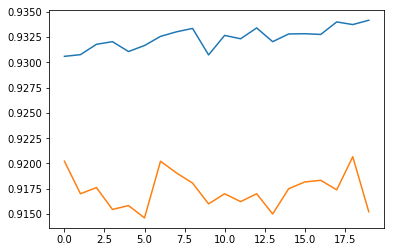

In [15]:
# Checking the Training and Validation Accuracy Curves w.r.t Epoch #
plt.plot(mlp_train_hist.history['acc'])
plt.plot(mlp_train_hist.history['val_acc'])

In [16]:
# Trying to fit a 4 Layer (2 Hidden Layers) Model
model_mlp = Sequential()
model_mlp.add(Dense(64, input_shape = (28*28,)))
model_mlp.add(Dense(64))
model_mlp.add(Dense(10, activation = 'softmax'))

In [17]:
model_mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [18]:
model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
mlp_train_hist = model_mlp.fit(X_train_mp, y_train_cvec, epochs = 20, validation_data = (X_test_mp, y_test_cvec), verbose = 2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 4s - loss: 0.2993 - acc: 0.9141 - val_loss: 0.3184 - val_acc: 0.9136
Epoch 2/20
 - 4s - loss: 0.2914 - acc: 0.9175 - val_loss: 0.2963 - val_acc: 0.9176
Epoch 3/20
 - 4s - loss: 0.2850 - acc: 0.9207 - val_loss: 0.2784 - val_acc: 0.9205
Epoch 4/20
 - 4s - loss: 0.2809 - acc: 0.9206 - val_loss: 0.2957 - val_acc: 0.9189
Epoch 5/20
 - 4s - loss: 0.2770 - acc: 0.9229 - val_loss: 0.3109 - val_acc: 0.9125
Epoch 6/20
 - 4s - loss: 0.2756 - acc: 0.9227 - val_loss: 0.2861 - val_acc: 0.9260
Epoch 7/20
 - 4s - loss: 0.2702 - acc: 0.9239 - val_loss: 0.2947 - val_acc: 0.9145
Epoch 8/20
 - 5s - loss: 0.2693 - acc: 0.9245 - val_loss: 0.2831 - val_acc: 0.9201
Epoch 9/20
 - 4s - loss: 0.2670 - acc: 0.9252 - val_loss: 0.2962 - val_acc: 0.9211
Epoch 10/20
 - 4s - loss: 0.2659 - acc: 0.9256 - val_loss: 0.2932 - val_acc: 0.9217
Epoch 11/20
 - 6s - loss: 0.2639 - acc: 0.9261 - val_loss: 0.3041 - val_acc: 0.9155
Epoch 12/20
 - 4s - loss: 0.2621 - 

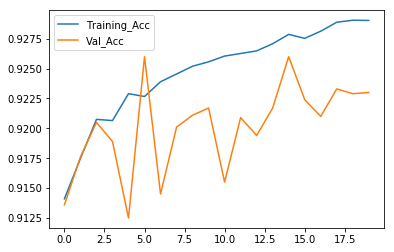

In [22]:
# Checking the Training and Validation Accuracy Curves w.r.t Epoch #
plt.plot(mlp_train_hist.history['acc'], label = 'Training_Acc')
plt.plot(mlp_train_hist.history['val_acc'], label = 'Val_Acc')
plt.legend()

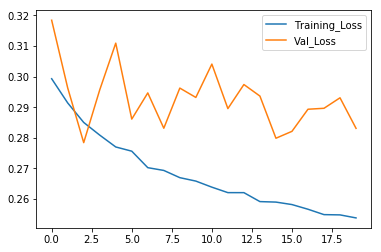

In [23]:
# Checking the Training and Validation Loss Curves w.r.t Epoch #
plt.plot(mlp_train_hist.history['loss'], label = 'Training_Loss')
plt.plot(mlp_train_hist.history['val_loss'], label = 'Val_Loss')
plt.legend()

In [24]:
# Trying to fit a 5 Layer (3 Hidden Layers) Model
model_mlp = Sequential()
model_mlp.add(Dense(64, input_shape = (28*28,)))
model_mlp.add(Dense(16))
model_mlp.add(Dense(16))
model_mlp.add(Dense(10, activation = 'softmax'))

In [25]:
model_mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                170       
Total params: 51,722
Trainable params: 51,722
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
mlp_train_hist = model_mlp.fit(X_train_mp, y_train_cvec, epochs = 20, validation_data = (X_test_mp, y_test_cvec), verbose = 2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 4s - loss: 0.3803 - acc: 0.8911 - val_loss: 0.3216 - val_acc: 0.9072
Epoch 2/20
 - 5s - loss: 0.2992 - acc: 0.9156 - val_loss: 0.2917 - val_acc: 0.9188
Epoch 3/20
 - 4s - loss: 0.2902 - acc: 0.9188 - val_loss: 0.2884 - val_acc: 0.9183
Epoch 4/20
 - 4s - loss: 0.2818 - acc: 0.9210 - val_loss: 0.2866 - val_acc: 0.9198
Epoch 5/20
 - 4s - loss: 0.2790 - acc: 0.9223 - val_loss: 0.2872 - val_acc: 0.9187
Epoch 6/20
 - 5s - loss: 0.2753 - acc: 0.9235 - val_loss: 0.2893 - val_acc: 0.9165
Epoch 7/20
 - 4s - loss: 0.2725 - acc: 0.9238 - val_loss: 0.2737 - val_acc: 0.9226
Epoch 8/20
 - 5s - loss: 0.2689 - acc: 0.9235 - val_loss: 0.2864 - val_acc: 0.9218
Epoch 9/20
 - 4s - loss: 0.2672 - acc: 0.9251 - val_loss: 0.3026 - val_acc: 0.9162
Epoch 10/20
 - 6s - loss: 0.2658 - acc: 0.9259 - val_loss: 0.2924 - val_acc: 0.9220
Epoch 11/20
 - 5s - loss: 0.2645 - acc: 0.9250 - val_loss: 0.2798 - val_acc: 0.9228
Epoch 12/20
 - 6s - loss: 0.2631 - 

KeyboardInterrupt: 

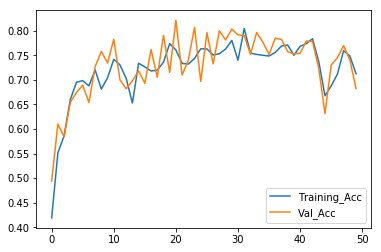

In [70]:
# Checking the Training and Validation Accuracy Curves w.r.t Epoch #
plt.plot(mlp_train_hist.history['acc'], label = 'Training_Acc')
plt.plot(mlp_train_hist.history['val_acc'], label = 'Val_Acc')
plt.legend()

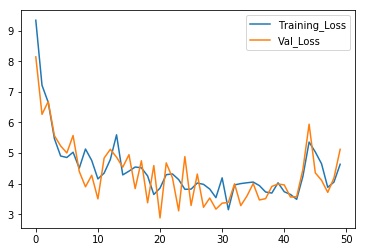

In [71]:
# Checking the Training and Validation Loss Curves w.r.t Epoch #
plt.plot(mlp_train_hist.history['loss'], label = 'Training_Loss')
plt.plot(mlp_train_hist.history['val_loss'], label = 'Val_Loss')
plt.legend()

In [10]:
# Trying to fit a 5 Layer (3 Hidden Layers) Model
# Our last model was really successful, hence trying to fit a model with 
# same kind of architecture with Dropout layers
model_mlp = Sequential()
model_mlp.add(Dense(512, activation='relu', input_shape = (28*28,)))
model_mlp.add(Dropout(0.6))
model_mlp.add(Dense(512, activation='relu'))
model_mlp.add(Dropout(0.6))
model_mlp.add(Dense(10, activation = 'softmax'))

In [11]:
model_mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
mlp_train_hist = model_mlp.fit(X_train_mp, y_train_cvec, epochs = 20, validation_data = (X_test_mp, y_test_cvec), batch_size=256, verbose = 2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 10s - loss: 9.6008 - acc: 0.4005 - val_loss: 6.2069 - val_acc: 0.6136
Epoch 2/20
 - 9s - loss: 6.8529 - acc: 0.5725 - val_loss: 5.3532 - val_acc: 0.6661
Epoch 3/20
 - 9s - loss: 6.1603 - acc: 0.6158 - val_loss: 4.8029 - val_acc: 0.7008
Epoch 4/20
 - 9s - loss: 5.4697 - acc: 0.6592 - val_loss: 5.0831 - val_acc: 0.6840
Epoch 5/20
 - 9s - loss: 5.5146 - acc: 0.6564 - val_loss: 3.7277 - val_acc: 0.7678
Epoch 6/20
 - 10s - loss: 4.9780 - acc: 0.6902 - val_loss: 2.6175 - val_acc: 0.8370
Epoch 7/20
 - 9s - loss: 4.5214 - acc: 0.7184 - val_loss: 2.3256 - val_acc: 0.8552
Epoch 8/20
 - 10s - loss: 4.1952 - acc: 0.7388 - val_loss: 2.6948 - val_acc: 0.8320
Epoch 9/20
 - 10s - loss: 3.9776 - acc: 0.7524 - val_loss: 2.4883 - val_acc: 0.8453
Epoch 10/20
 - 10s - loss: 3.6005 - acc: 0.7759 - val_loss: 2.2998 - val_acc: 0.8569
Epoch 11/20
 - 11s - loss: 3.5440 - acc: 0.7795 - val_loss: 2.1114 - val_acc: 0.8688
Epoch 12/20
 - 11s - loss: 3.

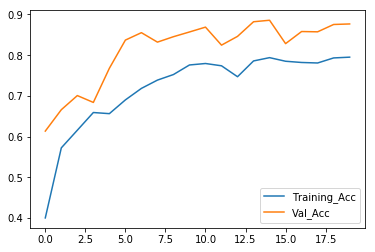

In [14]:
# Checking the Training and Validation Accuracy Curves w.r.t Epoch #
plt.plot(mlp_train_hist.history['acc'], label = 'Training_Acc')
plt.plot(mlp_train_hist.history['val_acc'], label = 'Val_Acc')
plt.legend()

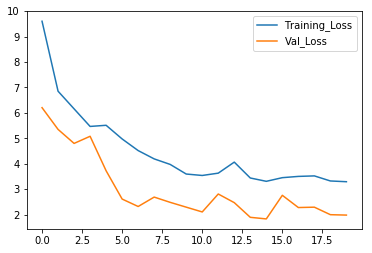

In [15]:
# Checking the Training and Validation Loss Curves w.r.t Epoch #
plt.plot(mlp_train_hist.history['loss'], label = 'Training_Loss')
plt.plot(mlp_train_hist.history['val_loss'], label = 'Val_Loss')
plt.legend()

In [9]:
# If we see the results for the previous few examples, we can see that, 
# the overall accuracy is not as well as expected. This is because we havent used regularization.
# We can use regularization and make the data in range 
X_train_mp = X_train_mp/255
X_test_mp = X_test_mp/255
X_train_mp = X_train_mp - np.mean(X_train_mp)
X_test_mp = X_test_mp - np.mean(X_test_mp)

In [10]:
# Trying to fit a 5 Layer (3 Hidden Layers) Model
# Our last model was really successful, hence trying to fit a model with 
# same kind of architecture with Dropout layers
model_mlp = Sequential()
model_mlp.add(Dense(512, input_shape = (28*28,)))
model_mlp.add(LeakyReLU(alpha = 0.003))
model_mlp.add(Dropout(0.6))
model_mlp.add(Dense(512))
model_mlp.add(LeakyReLU(alpha = 0.003))
model_mlp.add(Dropout(0.6))
model_mlp.add(Dense(10, activation = 'softmax'))

In [11]:
model_mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total para

In [12]:
model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
mlp_train_hist = model_mlp.fit(X_train_mp, y_train_cvec, epochs = 20, validation_data = (X_test_mp, y_test_cvec), batch_size=256, verbose = 2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 10s - loss: 0.4798 - acc: 0.8483 - val_loss: 0.1676 - val_acc: 0.9502
Epoch 2/20
 - 10s - loss: 0.2178 - acc: 0.9344 - val_loss: 0.1183 - val_acc: 0.9615
Epoch 3/20
 - 10s - loss: 0.1728 - acc: 0.9481 - val_loss: 0.0920 - val_acc: 0.9720
Epoch 4/20
 - 10s - loss: 0.1501 - acc: 0.9541 - val_loss: 0.0848 - val_acc: 0.9730
Epoch 5/20
 - 10s - loss: 0.1356 - acc: 0.9582 - val_loss: 0.0816 - val_acc: 0.9746
Epoch 6/20
 - 10s - loss: 0.1213 - acc: 0.9630 - val_loss: 0.0724 - val_acc: 0.9774
Epoch 7/20
 - 10s - loss: 0.1136 - acc: 0.9655 - val_loss: 0.0694 - val_acc: 0.9783
Epoch 8/20
 - 10s - loss: 0.1052 - acc: 0.9687 - val_loss: 0.0741 - val_acc: 0.9776
Epoch 9/20
 - 11s - loss: 0.0979 - acc: 0.9691 - val_loss: 0.0710 - val_acc: 0.9791
Epoch 10/20
 - 11s - loss: 0.0943 - acc: 0.9704 - val_loss: 0.0702 - val_acc: 0.9792
Epoch 11/20
 - 11s - loss: 0.0883 - acc: 0.9727 - val_loss: 0.0654 - val_acc: 0.9803
Epoch 12/20
 - 11s - los

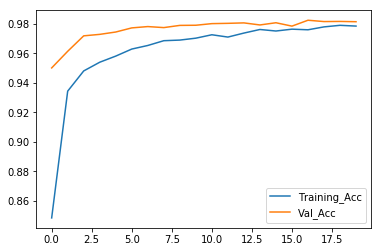

In [14]:
# Checking the Training and Validation Accuracy Curves w.r.t Epoch #
plt.plot(mlp_train_hist.history['acc'], label = 'Training_Acc')
plt.plot(mlp_train_hist.history['val_acc'], label = 'Val_Acc')
plt.legend()

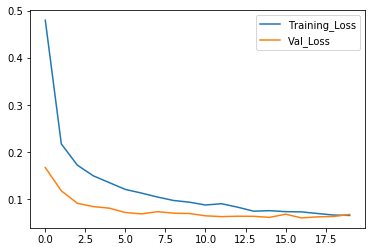

In [15]:
# Checking the Training and Validation Loss Curves w.r.t Epoch #
plt.plot(mlp_train_hist.history['loss'], label = 'Training_Loss')
plt.plot(mlp_train_hist.history['val_loss'], label = 'Val_Loss')
plt.legend()

In [16]:
model_mlp.evaluate(X_test_mp, y_test_cvec)

10000/10000 [==============================] - 1s 125us/step


[0.06828200230532093, 0.9816]

In [19]:
y_test_pred = np.argmax(model_mlp.predict(X_test_mp), axis=1)

In [20]:
pd.crosstab(y_test, y_test_pred)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,972,1,1,0,1,1,2,1,1,0
1,0,1128,3,1,0,1,2,0,0,0
2,1,2,1019,0,1,0,1,6,2,0
3,0,0,5,987,0,5,0,8,2,3
4,0,0,3,0,972,0,4,1,0,2
5,2,0,0,4,1,873,6,1,3,2
6,2,2,0,0,3,2,948,0,1,0
7,1,7,9,0,0,0,0,1008,0,3
8,6,1,3,4,3,4,7,4,938,4


In [ ]:
# Trying to Visualize a bunch of random digits
def visualize_prediction(grid_dimension: tuple, fig_size: tuple = (10, 10), dataset = (X_test, y_test, y_pred)):
    if len(grid_dimension) != 2:
        raise ValueError('Inavlid dimension for the grid dimenison tuple')
    else:
        _, axes = plt.subplots(grid_dimension[0], grid_dimension[-1], figsize=fig_size, squeeze=False)
        random_choice_index = np.random.choice(np.arange(len(dataset[0])), grid_dimension)
        for x_index in range(grid_dimension[0]):
            for y_index in range(grid_dimension[-1]):
                axes[x_index][y_index].imshow(dataset[0][random_choice_index[x_index, y_index]], cmap='gray')
                axes[x_index][y_index].set_title(f'Digit: {dataset[-1][random_choice_index[x_index, y_index]]}')

In [11]:
# Defining the Multilayer Perceptron Model
model_mlp = Sequential()
# We are defining a multilayer perceptron with 3 Hidden layers
model_mlp.add(Dense(2**10, input_shape = (28*28,)))
# Adding a dropout layer to prevent overfitting
model_mlp.add(Dropout(0.25))
model_mlp.add(Dense(2**8))
#model_mlp.add(Dense(64))
#model_mlp.add(Dense(64))
# Adding a dropout layer to prevent overfitting
model_mlp.add(Dropout(0.25))
# Finally adding the output layer that corresponds to the classification
# The output layer is of size 10 (contains 10 nodes) because each node corresponds to each class
model_mlp.add(Dense(10, activation='softmax'))

In [12]:
# Printing the model summary
model_mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               262400    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 1,068,810
Trainable params: 1,068,810
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compiling the model
model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
train_history_mlp = model_mlp.fit(X_train_mp, y_train_cvec, epochs=15, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
32416/42000 [======================>.......] - ETA: 11s - loss: 14.2354 - acc: 0.1167

KeyboardInterrupt: 

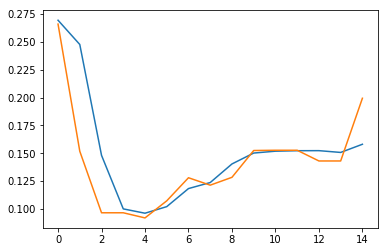

In [78]:
plt.plot(train_history_mlp.history['acc'])
plt.plot(train_history_mlp.history['val_acc'])

In [ ]:
# Defining the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 3)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [116]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 4, 4, 64)          0         
__________

In [117]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [118]:
model.fit(X_train, y_train, batch_size=50, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 312s 5ms/step - loss: 14.4702 - acc: 0.1022
Epoch 2/10
11750/60000 [====>.........................] - ETA: 4:09 - loss: 14.4130 - acc: 0.1058

KeyboardInterrupt: 